In [59]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

import matplotlib as mpl

In [60]:
mpl.rcParams['figure.dpi'] = 300

In [21]:
base = pd.read_csv("./emg_hand_raw_data/Sem eletrodos/tek0000ALL.csv", skiprows=20)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TIME                                100000 non-null  float64
 1   CH1                                 100000 non-null  float64
 2   Unnamed: 2                          0 non-null       float64
 3   FREQUENCY                           100000 non-null  float64
 4   MATH<FFT(CH1, HANNING, LINEARRMS)>  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


In [22]:
base.head()

,TIME,CH1,Unnamed: 2,FREQUENCY,"MATH<FFT(CH1, HANNING, LINEARRMS)>"
0,-0.200000,0.016484,NaN,0.00,0.004020
1,-0.199996,0.015859,NaN,1.25,0.003449
2,-0.199992,0.016016,NaN,2.50,0.002880
3,-0.199988,0.016016,NaN,3.75,0.001475
4,-0.199984,0.015234,NaN,5.00,0.000071


<Axes: title={'center': 'No EMG'}, ylabel='CH1'>

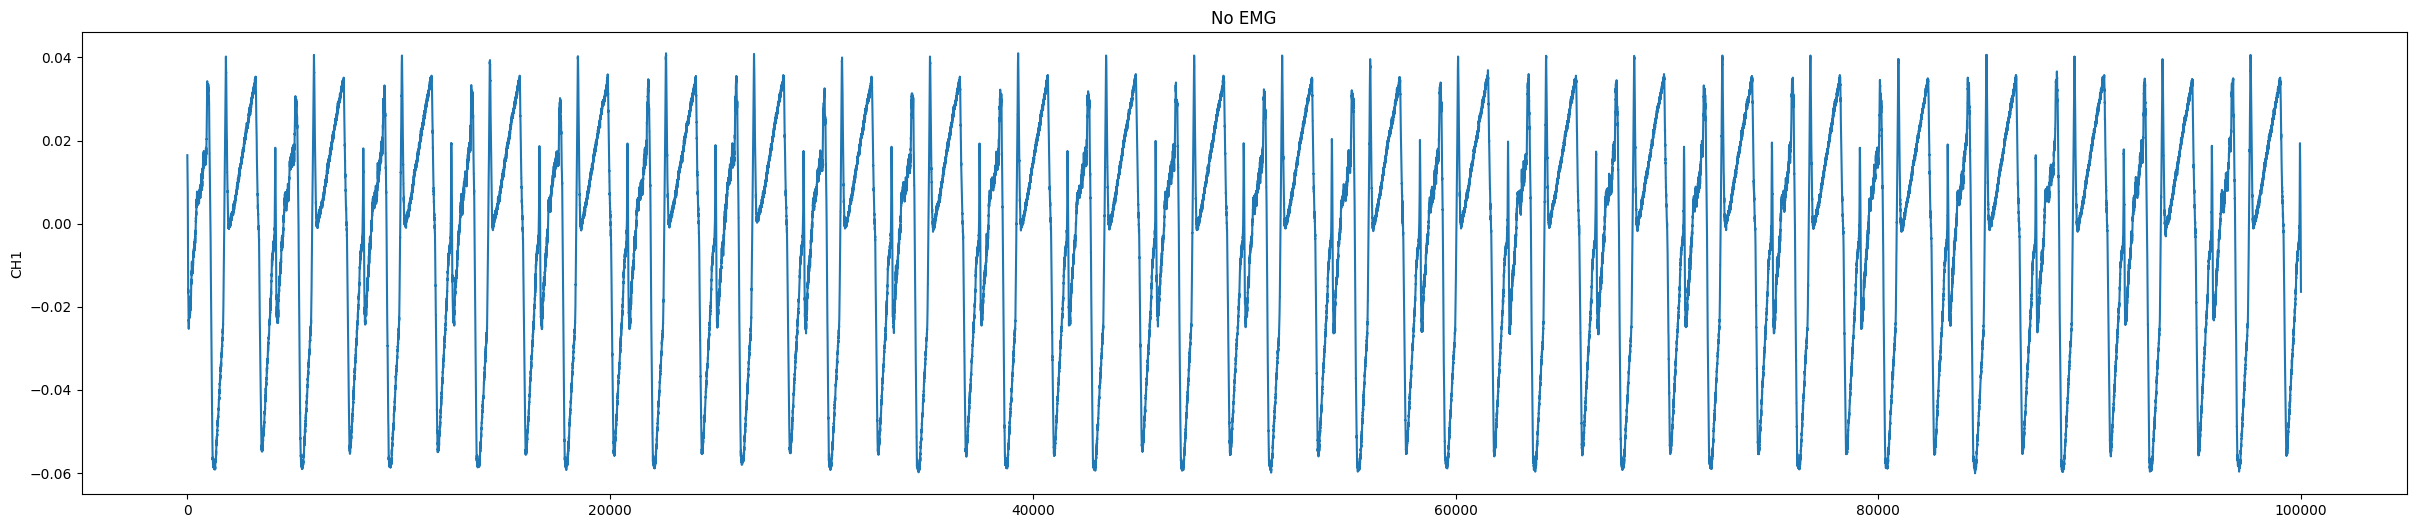

In [23]:
plt.figure(figsize=(30,6))
plt.title("No EMG")
sbn.lineplot(base.CH1)

In [24]:
relaxed = pd.read_csv("./emg_hand_raw_data/ponto 1a/relaxado/tek0000ALL.csv", skiprows=20)
relaxed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TIME                                100000 non-null  float64
 1   CH1                                 100000 non-null  float64
 2   Unnamed: 2                          0 non-null       float64
 3   FREQUENCY                           100000 non-null  float64
 4   MATH<FFT(CH1, HANNING, LINEARRMS)>  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


<Axes: title={'center': 'Relaxed'}, ylabel='CH1'>

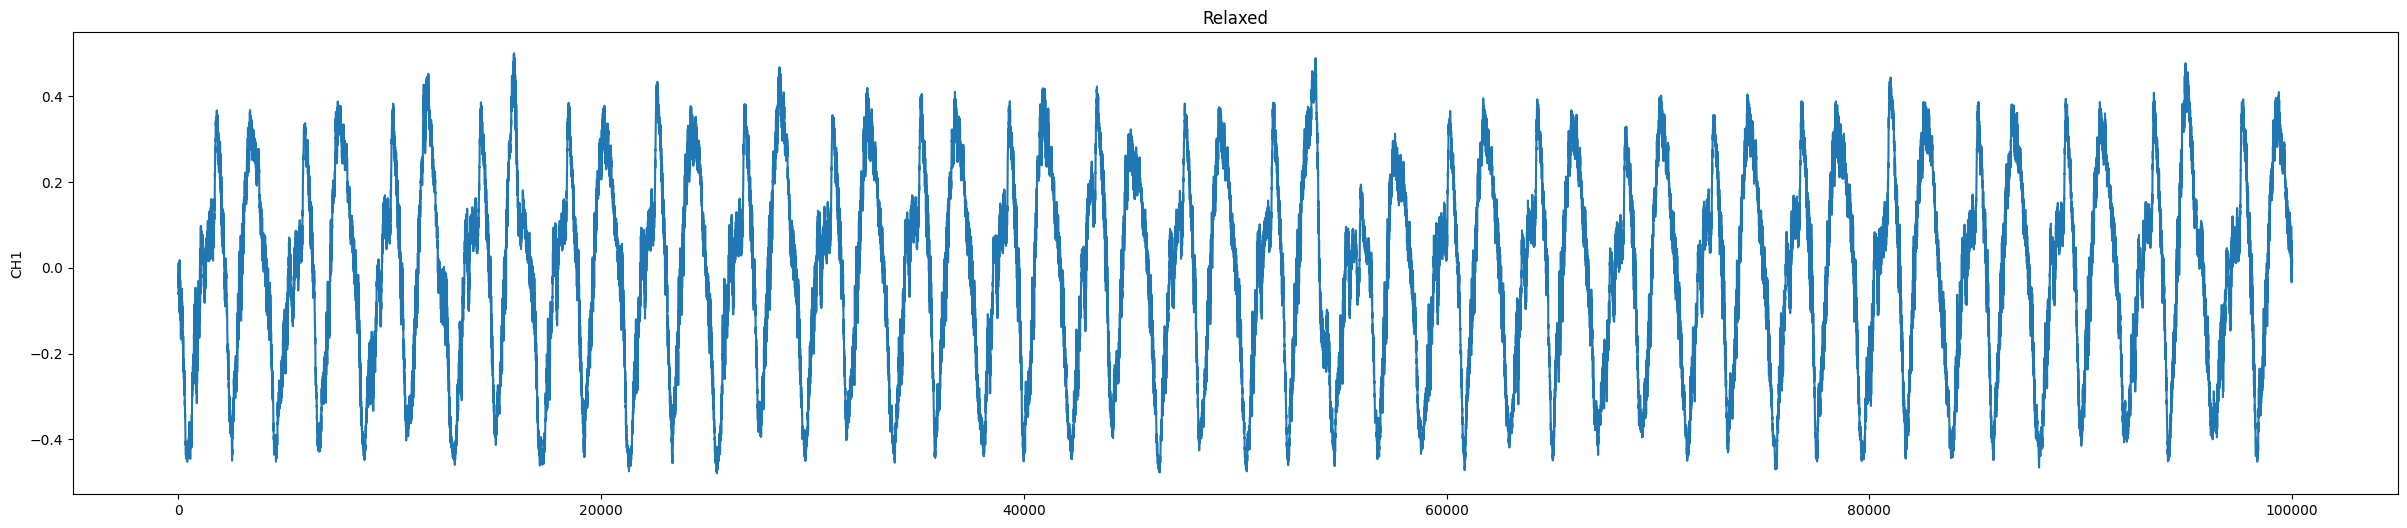

In [25]:
plt.figure(figsize=(30,6))
plt.title("Relaxed")
sbn.lineplot(relaxed.CH1)

In [26]:
contracted = pd.read_csv("./emg_hand_raw_data/ponto 1a/tek0001ALL.csv", skiprows=20)
contracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TIME                                100000 non-null  float64
 1   CH1                                 100000 non-null  float64
 2   Unnamed: 2                          0 non-null       float64
 3   FREQUENCY                           100000 non-null  float64
 4   MATH<FFT(CH1, HANNING, LINEARRMS)>  100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB


<Axes: title={'center': 'Contracted'}, ylabel='CH1'>

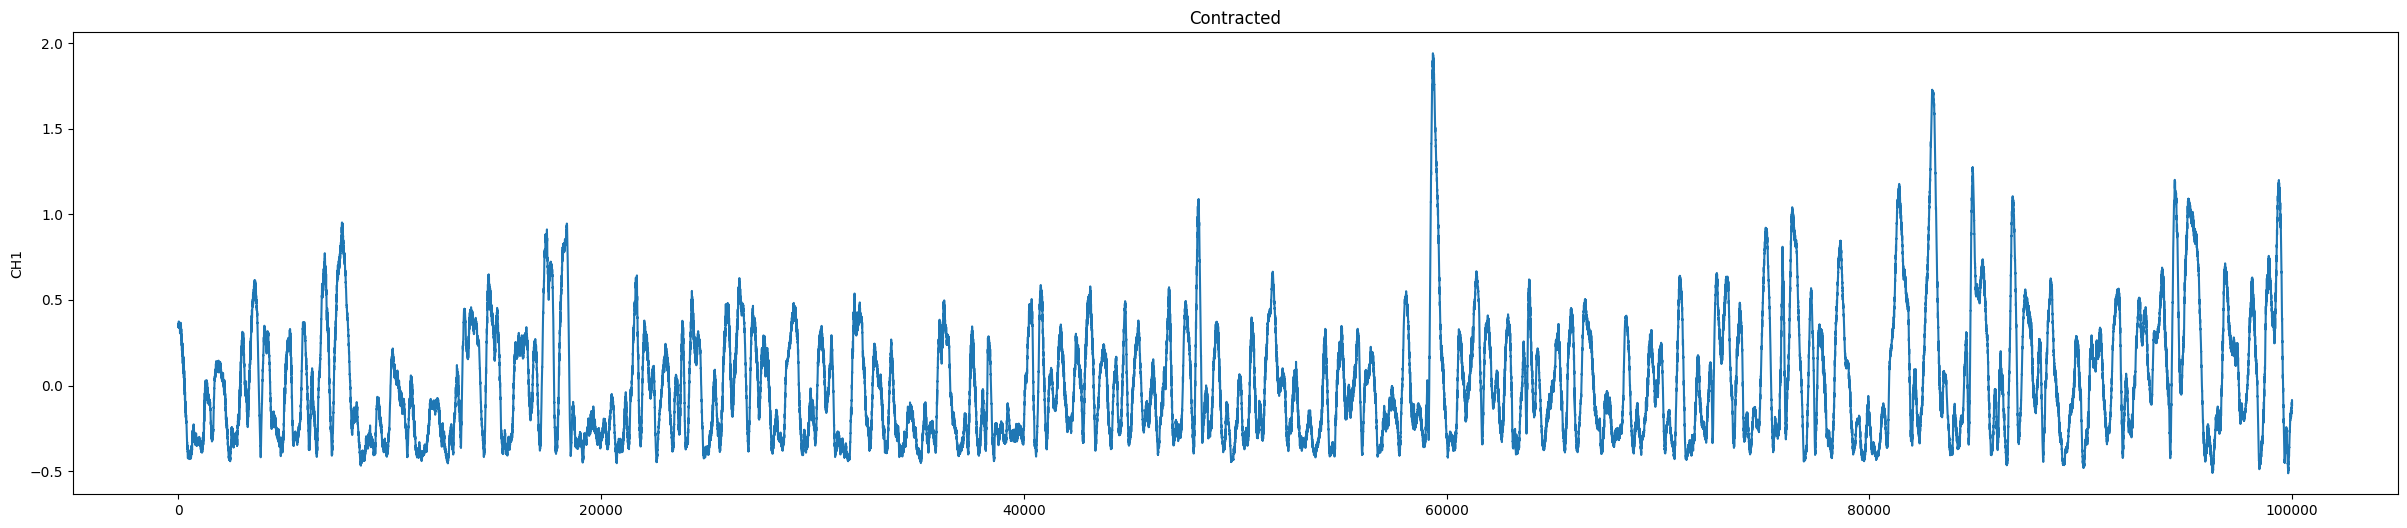

In [27]:
plt.figure(figsize=(30,6))
plt.title("Contracted")
sbn.lineplot(contracted.CH1)

<Axes: title={'center': 'Contracted FFT'}, ylabel='MATH<FFT(CH1, HANNING, LINEARRMS)>'>

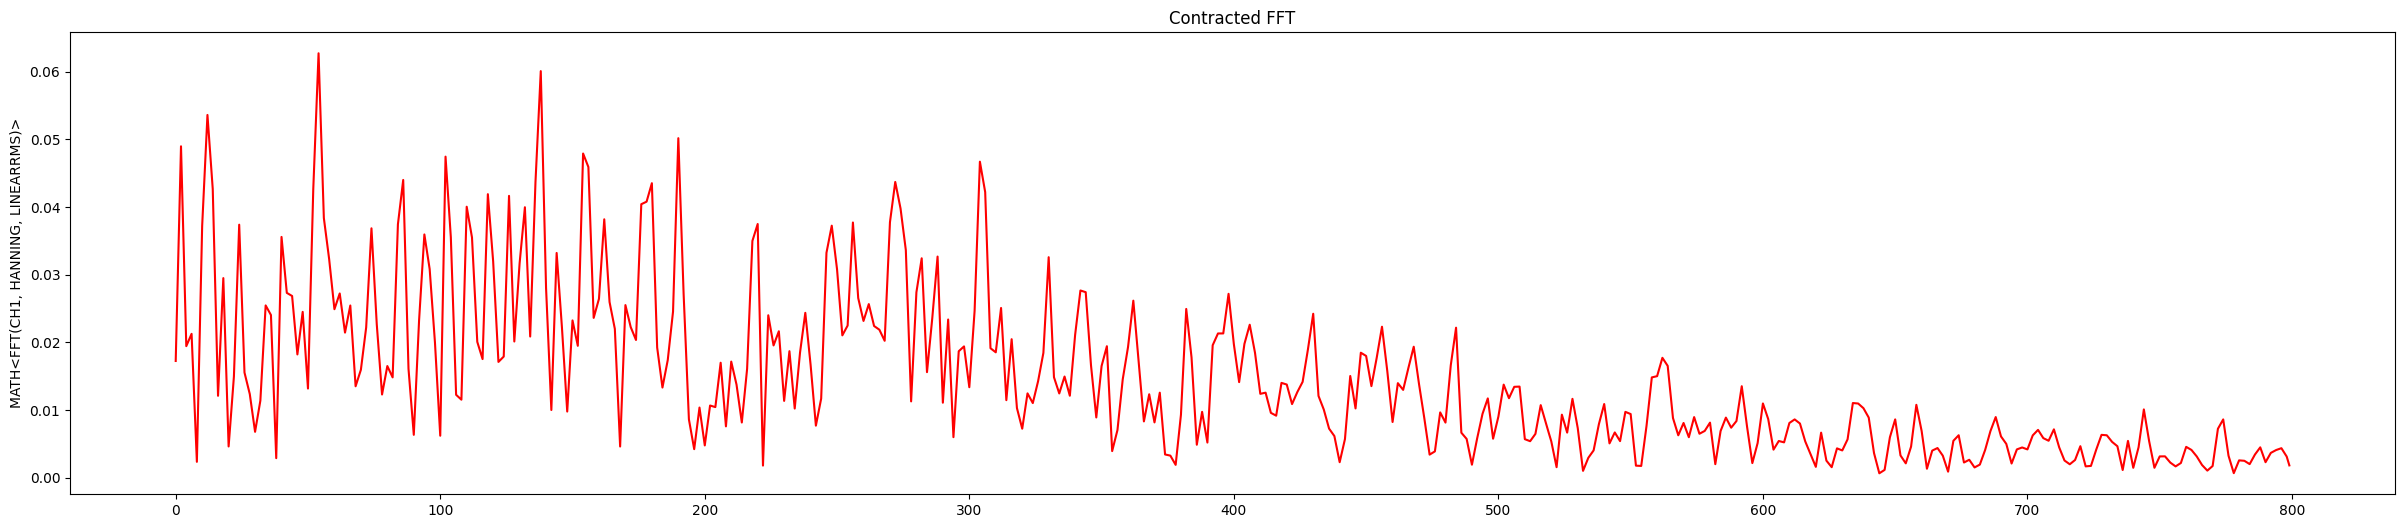

In [36]:
plt.figure(figsize=(30,6))
plt.title("Contracted FFT")
sbn.lineplot(contracted["MATH<FFT(CH1, HANNING, LINEARRMS)>"][:800], color='red')

<Axes: title={'center': 'Contracted Muscle'}, ylabel='CH1'>

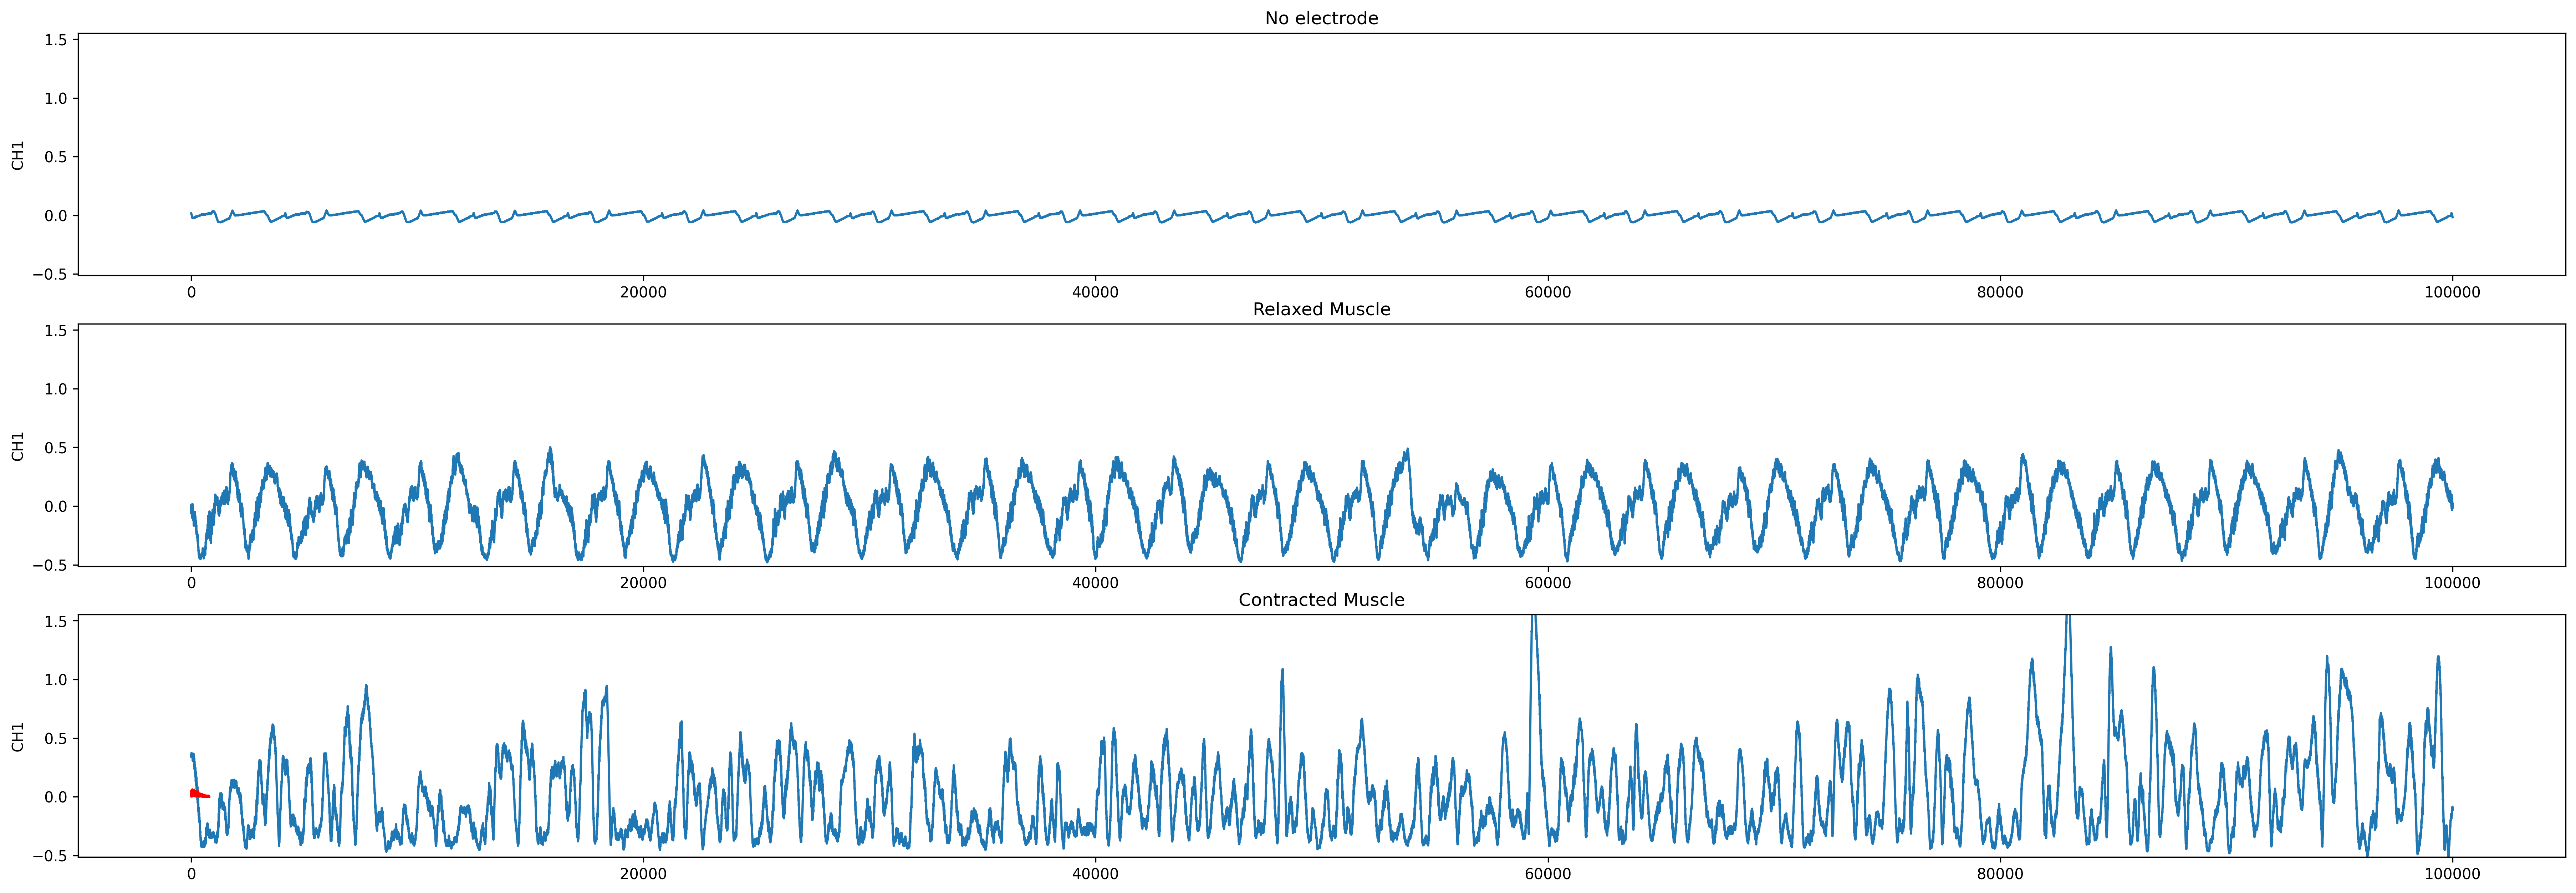

In [62]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
fig.set_size_inches((30,10))

max_amp = max(contracted.CH1)
min_amp = min(contracted.CH1)

limits = (min_amp, max_amp*.8)

ax0.set_title("No electrode")
ax0.set_ylim(limits)
sbn.lineplot(base.CH1, ax=ax0)

ax1.set_title("Relaxed Muscle")
ax1.set_ylim(limits)
sbn.lineplot(relaxed.CH1, ax=ax1)


ax2.set_title("Contracted Muscle")
ax2.set_ylim(limits)
sbn.lineplot(contracted.CH1, ax=ax2)

<Axes: title={'center': 'Contracted Muscle [FFT]'}, ylabel='MATH<FFT(CH1, HANNING, LINEARRMS)>'>

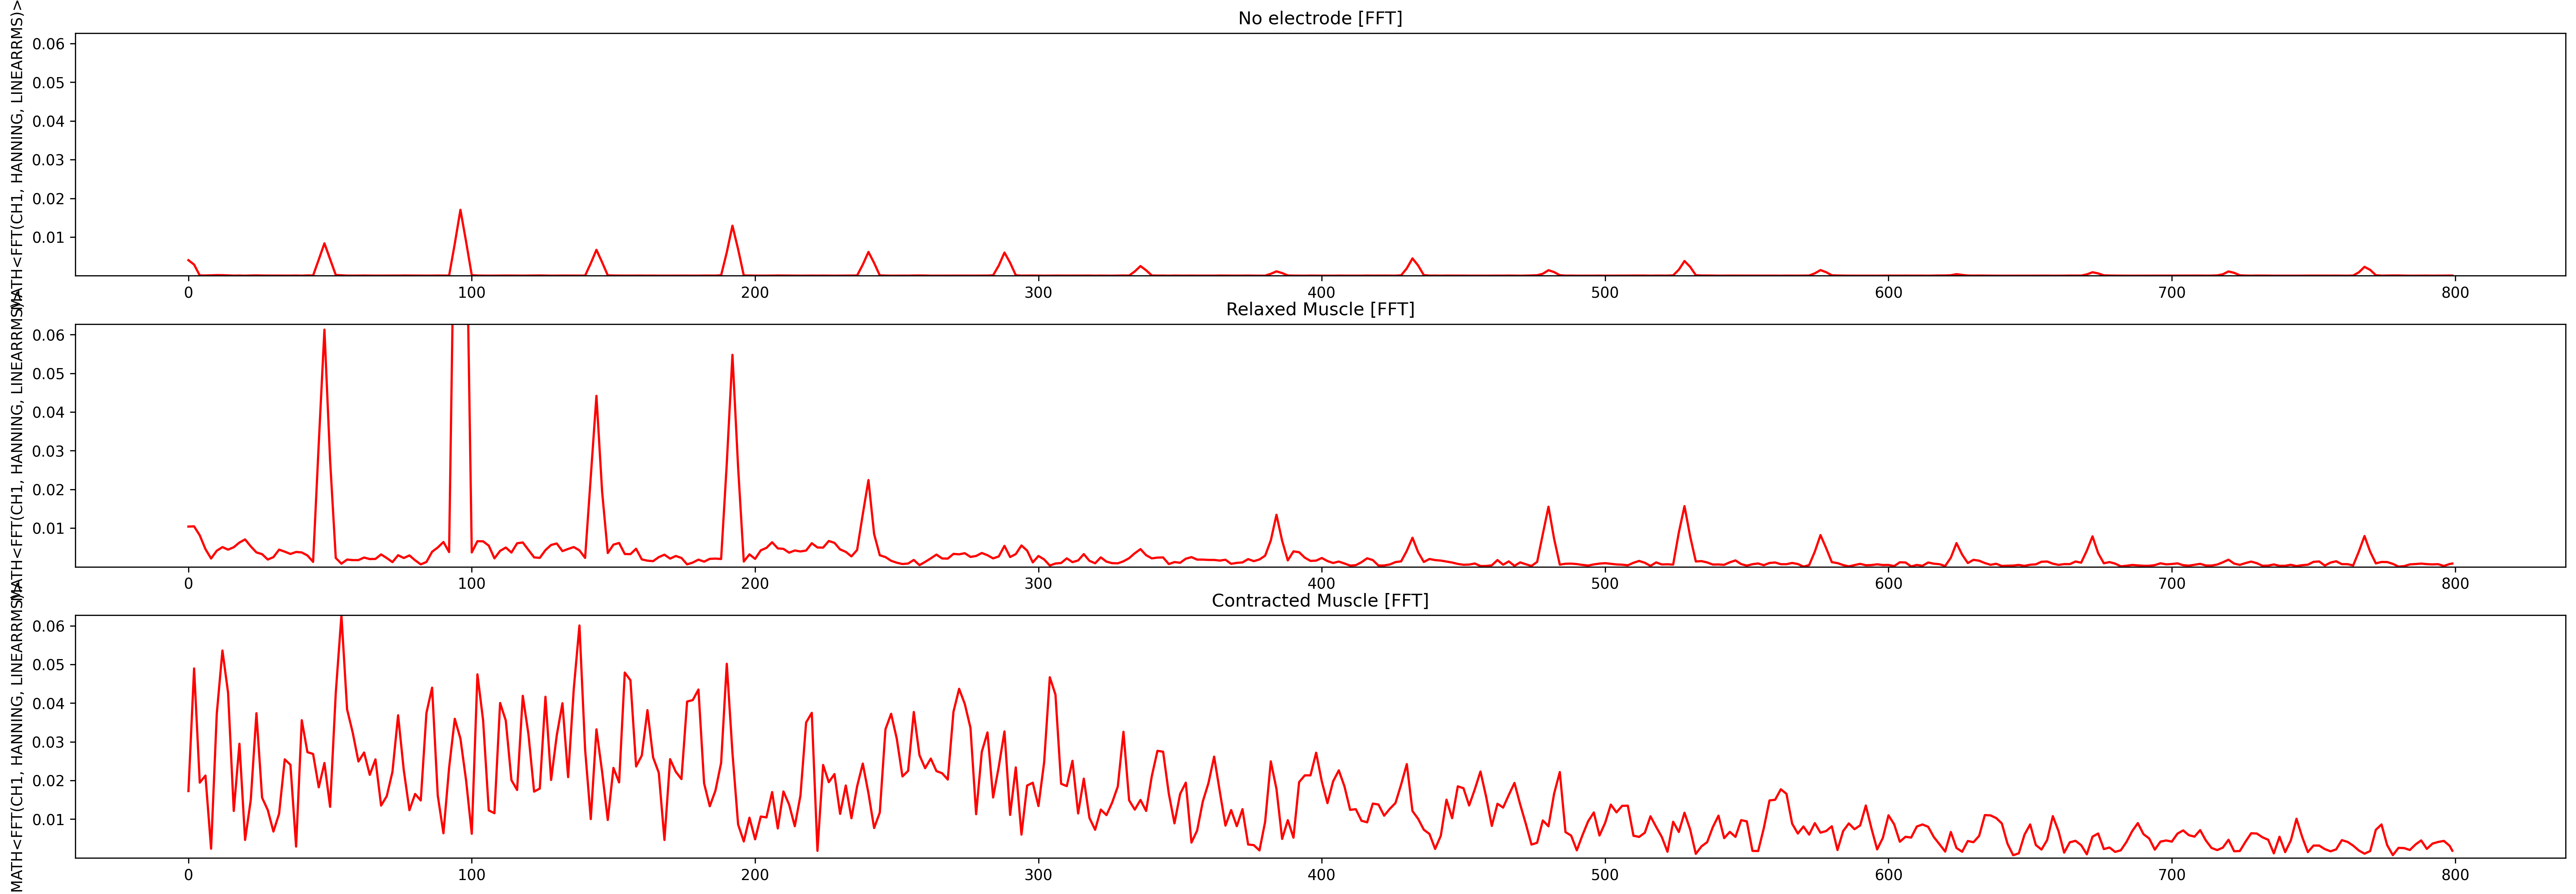

In [64]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
fig.set_size_inches((30,10))

fft_name = "MATH<FFT(CH1, HANNING, LINEARRMS)>"

max_amp = max(contracted[fft_name])
min_amp = min(contracted[fft_name])

limits = (min_amp, max_amp)

ax0.set_title("No electrode [FFT]")
ax0.set_ylim(limits)
sbn.lineplot(base[fft_name][:800], color='red', ax=ax0)

ax1.set_title("Relaxed Muscle [FFT]")
ax1.set_ylim(limits)
sbn.lineplot(relaxed[fft_name][:800], color='red', ax=ax1)


ax2.set_title("Contracted Muscle [FFT]")
ax2.set_ylim(limits)
ax2.set_ylabel("Amplitude")
sbn.lineplot(contracted[fft_name][:800], color='red', ax=ax2)

In [30]:
# https://docs.scipy.org/doc/scipy/tutorial/fft.html